## Superstore Dataset
***


### Introduction

In this notebook we will be using the [Super Store Dataset](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final) provided by Kaggle. 

The aim is to explore the various fields contained in the data by using data visualisation

In [64]:
# Importing our Modules
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot style
sns.set_theme()

# Loading in the data
df = pd.read_csv('Superstore Data.csv')

# Viewing a sample of the data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [65]:
# Describing the variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [66]:
# Shape of the data frame
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 9994
Number of columns: 21


In [67]:
# Data Types contained in the dataframe
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Text(0, 0.5, 'Number of Sales')

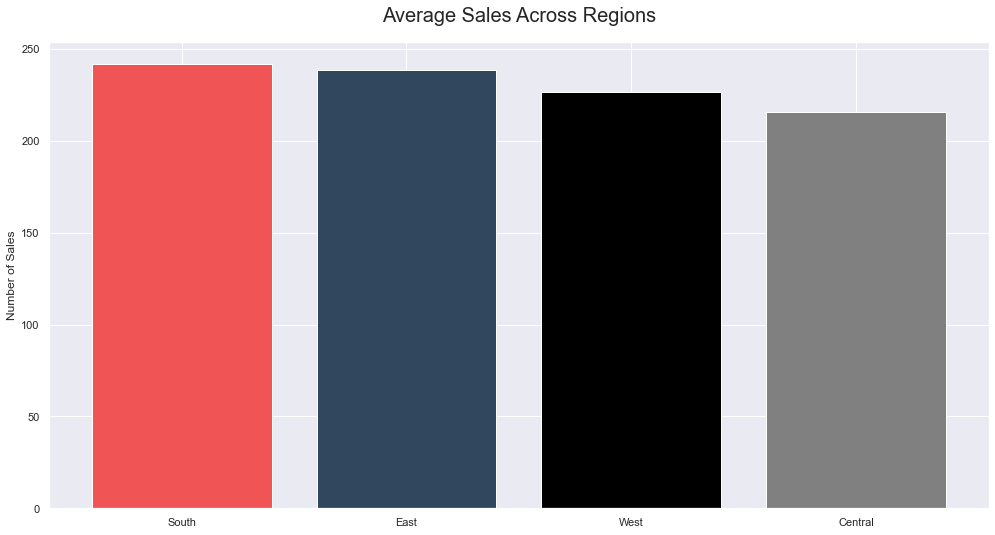

In [92]:
# Average Sales Across Different Regions

# Creating a subset of region and sales
region_sales = df[['Region', 'Sales']]

# Calculating Average sales per region
region_sales = region_sales.groupby('Region').mean().sort_values(by='Sales', ascending=False)

# Plotting the data

# Colour used in this notebook
red = '#F05454'
blue = '#30475E'

# Defining the plot
plt.figure(figsize=[15, 8])
plt.bar(region_sales.index, 'Sales', data=region_sales, color=[red, blue, 'black', 'grey'])

# Formatting the plot
plt.title('Average Sales Across Regions', size=20, pad=20)
plt.ylabel('Number of Sales')



Text(0.5, 1.0, 'Average Sales and Profit 2014-2018')

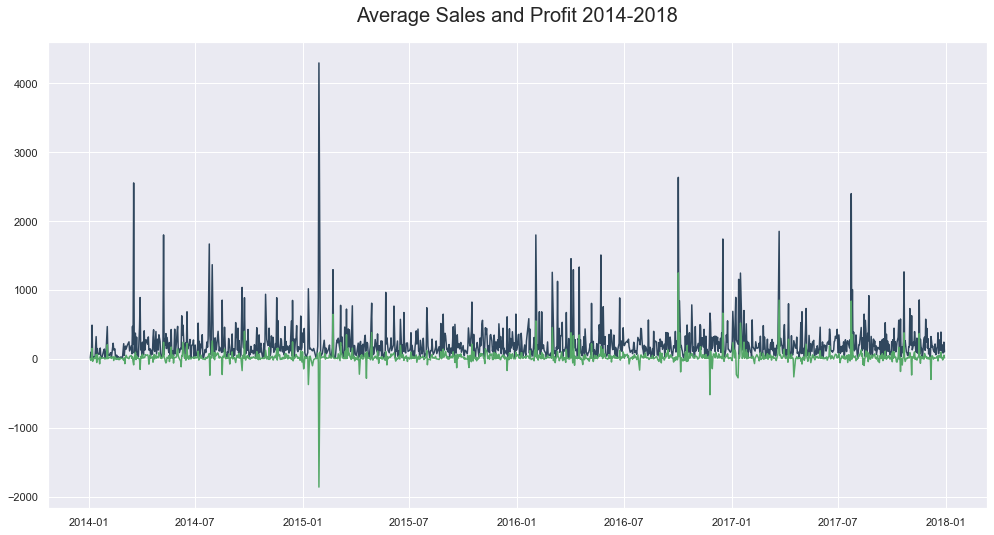

In [93]:
# Average Sales and profit over time

# Creating a subset of order date, sales and profit
date_sales_profit = df[['Order Date', 'Sales', 'Profit']].sort_values('Order Date')

# Converting format into datetime
date_sales_profit['Order Date'] = pd.to_datetime(date_sales_profit['Order Date'])

# Grouping to obtain average sales and profit on each day 
date_sales_profit_avg = date_sales_profit.groupby('Order Date').mean()

# Plotting the data
plt.figure(figsize=[15, 8])
plt.plot(date_sales_profit_avg.index, 'Sales', data=date_sales_profit_avg, color=blue)

plt.plot(date_sales_profit_avg.index, 'Profit', data=date_sales_profit_avg, color='g')

# Formatting the chart
plt.title('Average Sales and Profit 2014-2018', size=20, pad=20)

/Users/amritpalbasi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/amritpalbasi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit', ylabel='Density'>

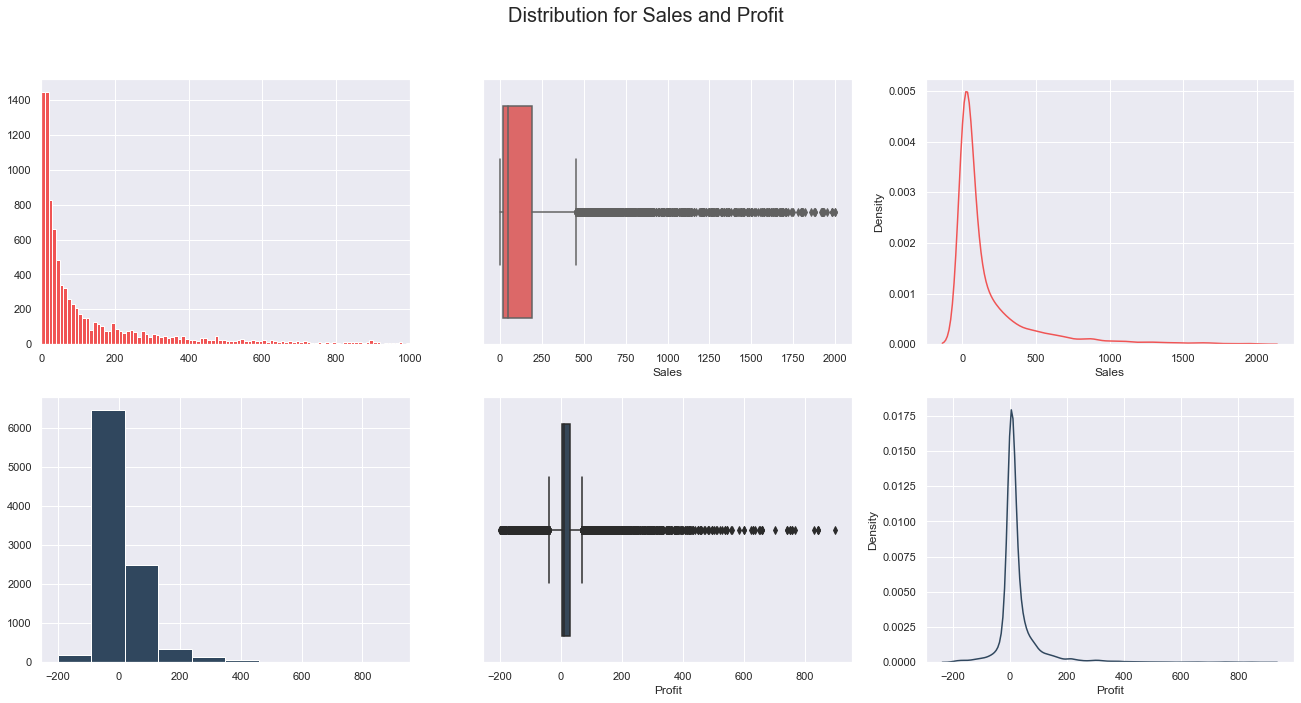

In [95]:
# Distribution

# Creating a subset of sales and profit
sales_profit = df[['Sales', 'Profit']]

# Removing outliers
sales_profit = sales_profit[sales_profit['Sales'] <= 2000]
sales_profit = sales_profit[sales_profit['Profit'] <= 2000]
sales_profit = sales_profit[sales_profit['Profit'] >= -200]

# Plotting the data
plt.figure(figsize=[20,10])
plt.suptitle("Distribution for Sales and Profit", size=20)

## Sales Plots ##
# Histogram for sales
plt.subplot(2, 3 ,1)
plt.hist(sales_profit['Sales'], bins=200, color=red)
plt.xlim(0,1000)

# Boxplot for sales
plt.subplot(2, 3, 2)
sns.boxplot(sales_profit['Sales'], color=red)

# KDE Plot for sales
plt.subplot(2, 3, 3)
sns.kdeplot(x=sales_profit['Sales'], color=red)


## Profit Plots ##
# Histogram for profit
plt.subplot(2, 3, 4)
plt.hist(sales_profit['Profit'], color=blue)

# Boxplot for profit
plt.subplot(2, 3, 5)
sns.boxplot(sales_profit['Profit'], color=blue)

# KDE Plot for profit
plt.subplot(2, 3, 6)
sns.kdeplot(x=sales_profit['Profit'], color=blue)


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

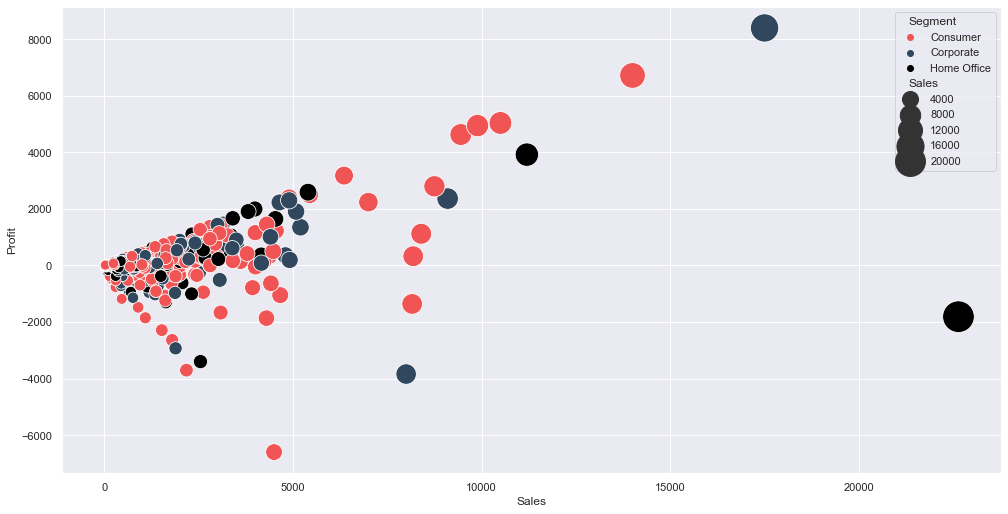

In [98]:
# Relationship between features

# Taking a subset of sales, profit and segment
sales_profit_segment = df[['Sales', 'Profit', 'Segment']]

# Plotting the data
plt.figure(figsize=[15, 8])

sns.scatterplot(x=sales_profit_segment['Sales'], y=sales_profit_segment['Profit'], hue=sales_profit_segment['Segment'], \
    palette=[red, blue, 'black'], size=sales_profit_segment['Sales'], sizes=(100, 1000), legend='auto')